In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

C:\Users\Sannsarca\anaconda3\envs\prog_1\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 1. Reading data and understanding it

In [3]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [12]:
df.shape

(303, 14)

<AxesSubplot:>

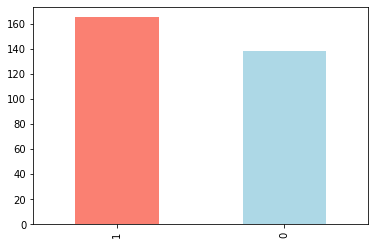

In [33]:
df['target'].value_counts().plot(kind='bar', color=['salmon','lightblue'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# 2. Finding patterns 

In [18]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [19]:
pd.crosstab(df['target'],df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


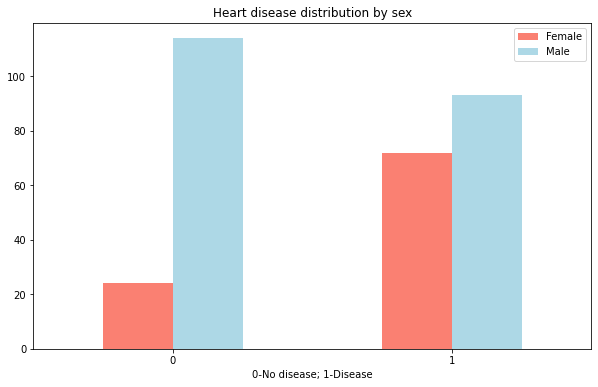

In [32]:
pd.crosstab(df['target'],df['sex']).plot(kind='bar', figsize=(10,6), color=['salmon','lightblue'])

plt.title('Heart disease distribution by sex')
plt.legend(['Female','Male'])
plt.xlabel('0-No disease; 1-Disease')
plt.xticks(rotation=0);

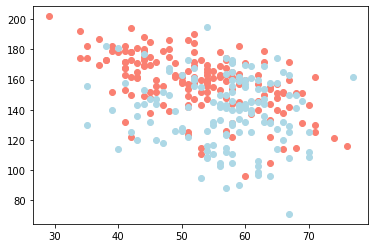

In [39]:
plt.scatter(x=df[df['target']==1]['age'], y= df[df['target']==1]['thalach'],c='salmon')
plt.scatter(x=df[df['target']==0]['age'], y= df[df['target']==0]['thalach'],c='lightblue')


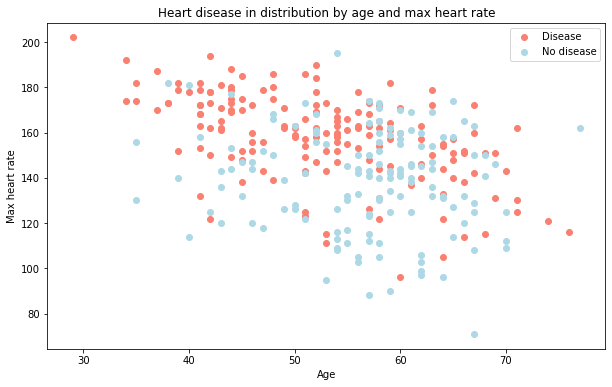

In [53]:
plt.figure(figsize=(10,6))

plt.scatter(x=df.age[df['target']==1], y= df.thalach[df['target']==1],c='salmon')
plt.scatter(x=df.age[df['target']==0], y= df.thalach[df['target']==0],c='lightblue')

plt.title("Heart disease in distribution by age and max heart rate")
plt.xlabel('Age')
plt.ylabel('Max heart rate')
plt.legend(['Disease','No disease'])

<AxesSubplot:ylabel='Frequency'>

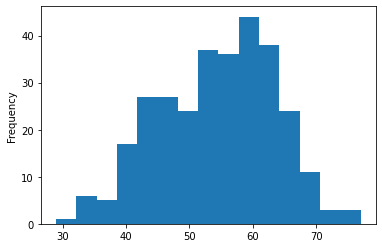

In [58]:
df.age.plot.hist(bins=15)

In [59]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


<AxesSubplot:xlabel='cp'>

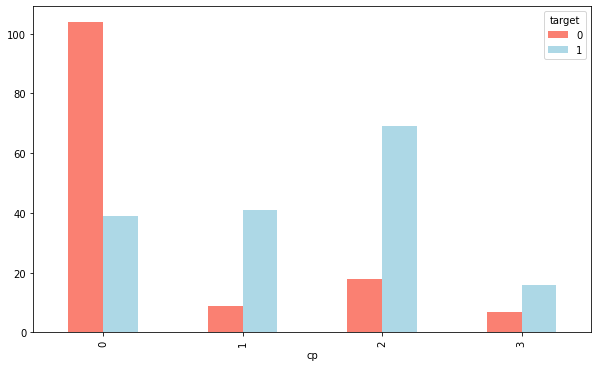

In [62]:
pd.crosstab(df.cp,df.target).plot(kind='bar', figsize=(10,6), color=['salmon','lightblue'])

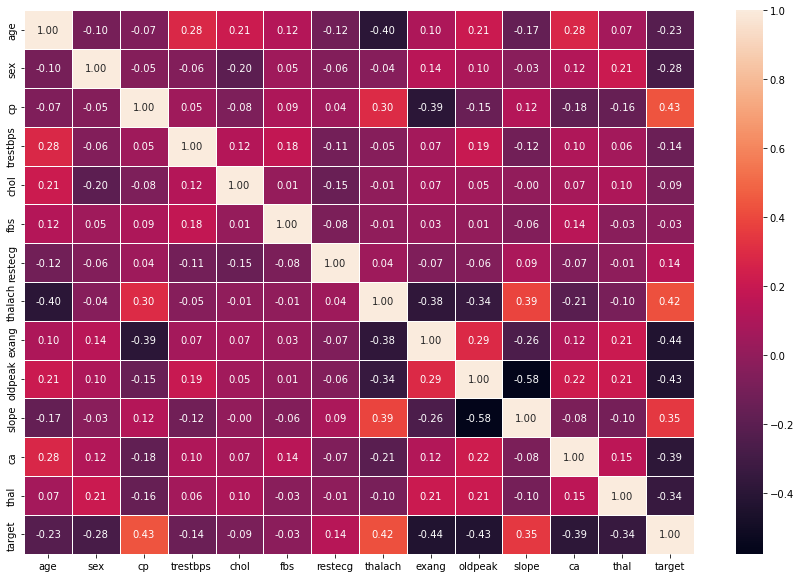

In [71]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(df.corr(), annot=True, linewidth=0.5, fmt=".2f")

# 3. Creating a model

In [73]:
X = df.drop('target', axis=1)
y = df['target']

In [76]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [77]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [82]:
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

def fit_predict(models,X_train,X_test,y_train,y_test):
    """
    Trying docstring...
    
    Cool :D
    """
    np.random.seed(42)
    model_scores={}
    
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
        
    return model_scores


In [87]:
model_scores=fit_predict(models,X_train,X_test,y_train,y_test)

C:\Users\Sannsarca\anaconda3\envs\prog_1\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [89]:
model_comparison = pd.DataFrame(model_scores,index=['accuracy'])

In [93]:
model_comparison = model_comparison.T
model_comparison

,Logistic Regression,KNN,Random Forest
accuracy,0.885246,0.688525,0.836066


# 4. Tuning models

In [114]:
train_scores=[]
test_scores=[]

neighbors = range(1,21)
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [115]:
max(test_scores) # so useful mosel :D

0.7540983606557377

Text(0, 0.5, 'Accuracy')

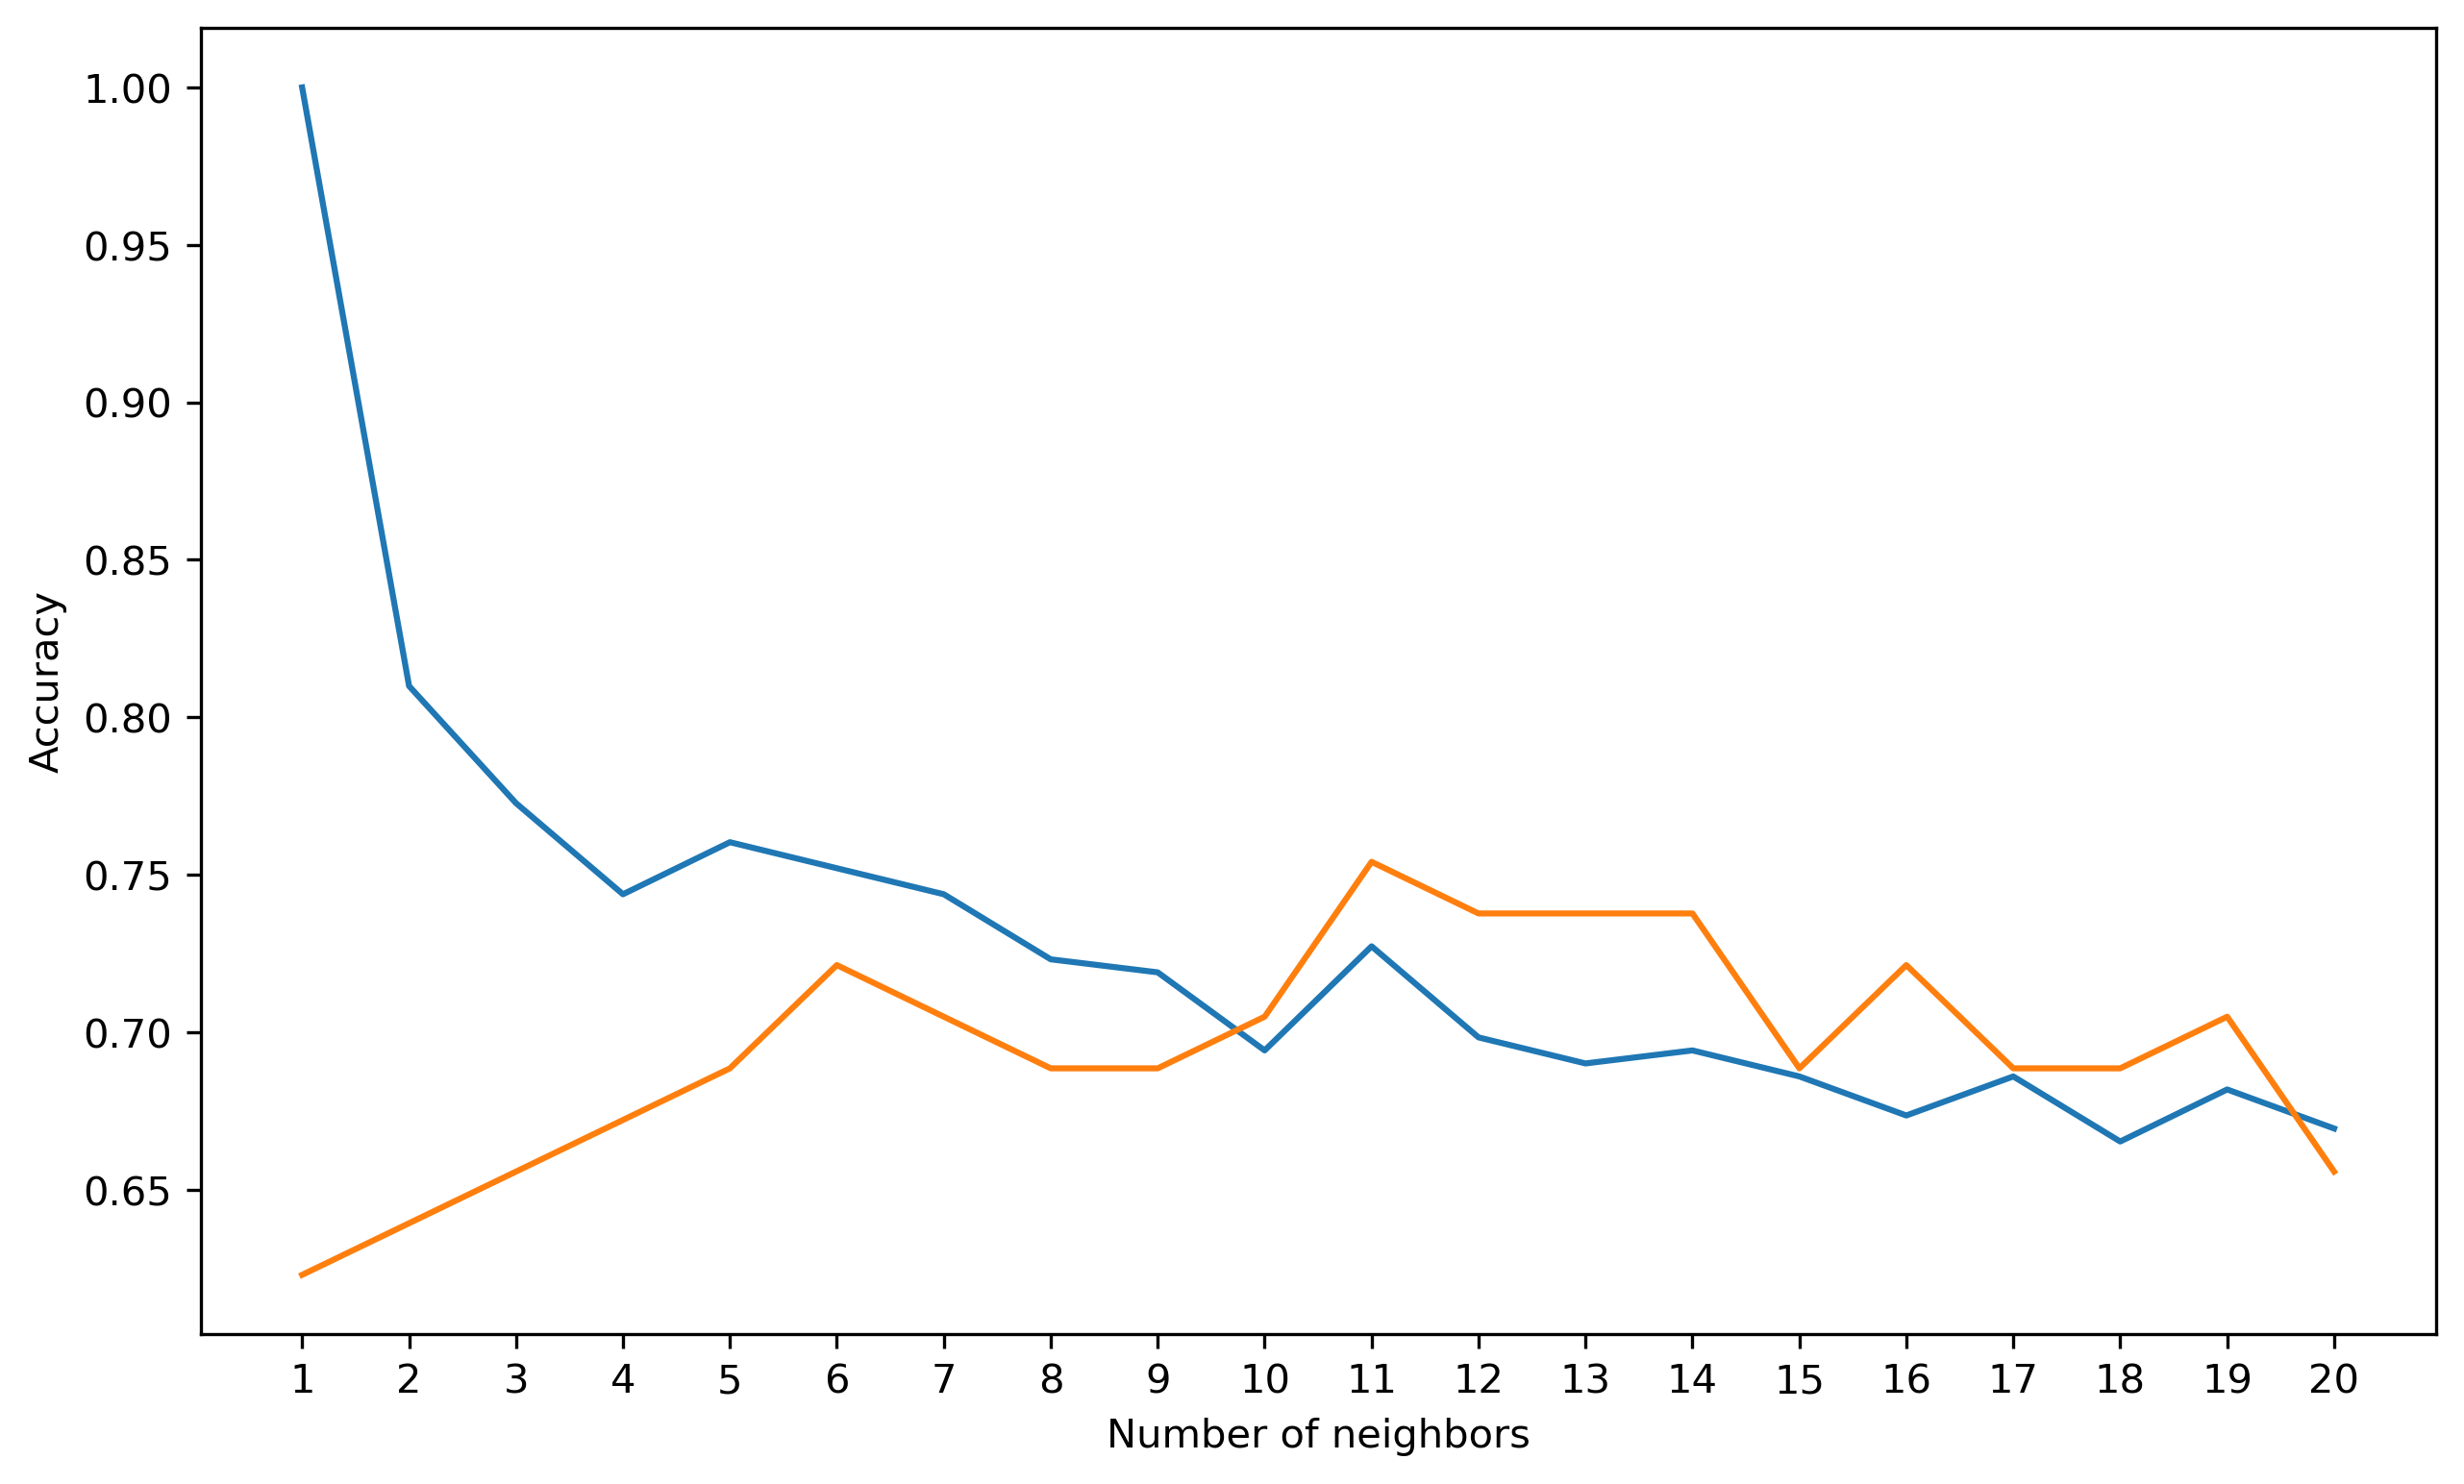

In [116]:
plt.figure(figsize=(10,6),dpi=300)
plt.plot(neighbors, train_scores, label='Train scores')
plt.plot(neighbors, test_scores, label='Test scores')
plt.xticks(neighbors)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [118]:
from sklearn.model_selection import RandomizedSearchCV

In [145]:
log_reg_grid = {'C':np.logspace(-4,4,20),
                'solver':["liblinear"]}

rf_grid = {'n_estimators': np.arange(10,1000,50),
           'max_depth': [None,3,5,10],
           'min_samples_split': np.arange(2,20,2),
          'min_samples_leaf':np.arange(1,20,2)}

In [125]:
#solving for Logistick regression
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

In [128]:
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [135]:
rs_log_reg.best_params_, rs_log_reg.score(X_test,y_test)

({'solver': 'liblinear', 'C': 0.23357214690901212}, 0.8852459016393442)

In [146]:
#solving for Random Forest
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions = rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

In [147]:
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [148]:
rs_rf.best_params_, rs_rf.score(X_test,y_test)

({'n_estimators': 210,
  'min_samples_split': 4,
  'min_samples_leaf': 19,
  'max_depth': 3},
 0.8688524590163934)

In [149]:
# trying GridSearchCV
from sklearn.model_selection import GridSearchCV

In [152]:
log_reg_grid = {'C':np.logspace(-4,4,30),
                'solver':["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                               param_grid = log_reg_grid,
                               cv=5,
                               verbose=True)

In [153]:
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [154]:
gs_log_reg.best_params_, gs_log_reg.score(X_test,y_test)

({'C': 0.20433597178569418, 'solver': 'liblinear'}, 0.8852459016393442)

# 5. Evaluating our model

In [155]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [157]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

C:\Users\Sannsarca\anaconda3\envs\prog_1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


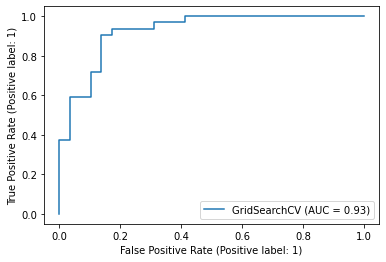

In [158]:
#ROC curve and AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)


In [159]:
#Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


In [176]:
def plot_conf_mat(y_test, y_preds):
    """
    Confusion matrix plot creating
    """
    
    fig, ax = plt.subplots(figsize=(3,3),dpi=200)
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")

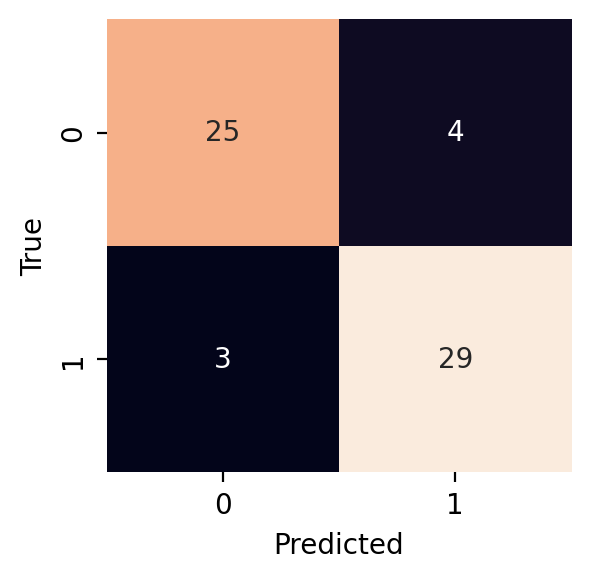

In [177]:
plot_conf_mat(y_test, y_preds)

In [166]:
#classification report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [179]:
#precision = 1 when there are no False positives (3)
#recall = 1 when there are no False negatives (4)
#f1 - no False positives and no False negatives

In [184]:
#Creating evaluation for CV
from sklearn.model_selection import cross_val_score
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [196]:
clf = LogisticRegression(C= 0.20433597178569418, solver= 'liblinear')

In [197]:
#accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [198]:
#precision
cv_pre = cross_val_score(clf, X, y, cv=5, scoring='precision')
cv_pre = np.mean(cv_pre)
cv_pre

0.8207936507936507

In [199]:
#recall
cv_rec = cross_val_score(clf, X, y, cv=5, scoring='recall')
cv_rec = np.mean(cv_rec)
cv_rec

0.9212121212121213

In [200]:
#f1
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

In [202]:
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           'Precision': cv_pre,
                           'Recall': cv_rec,
                           'f1': cv_f1},index=[0])
cv_metrics

,Accuracy,Precision,Recall,f1
0,0.844699,0.820794,0.921212,0.867301


<AxesSubplot:>

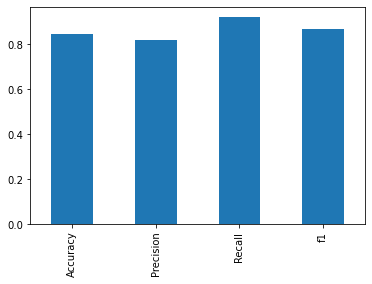

In [204]:
cv_metrics.T.plot.bar(legend=False)

# 6. Feature importance

In [209]:
clf.fit(X_train, y_train)
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [212]:
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))

In [213]:
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

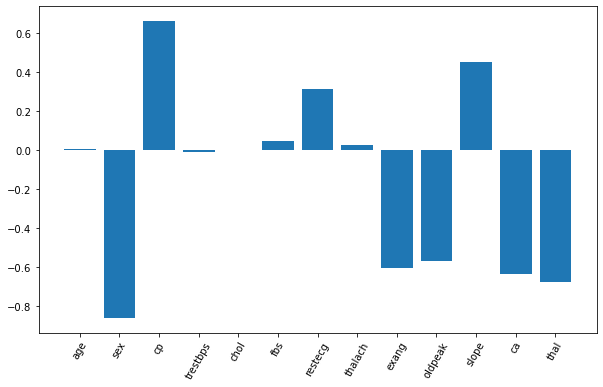

In [227]:
plt.figure(figsize=(10,6))
plt.bar(feature_dict.keys(),feature_dict.values())
plt.xticks(rotation=60);